# Finding Recency, Frequency and Monetary Value of Customers

In this lesson, we will be engineering new features from the cleaned transactional dataset to answer three major questions about each unique customer:

- **When did each unique customer make his/her last purchase?** (Recency)
- **How many times did each unique customer make a purchase?** (Frequency)
- **How much did each unique customer spend in total?** (Monetary Value)

Also, our goal with this lesson is to prepare the data in order to perform customer profiling and segmentation.

Let us start by importing the necessary libraries,

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Next, importing the CSV file called `customer_dataset.csv` which contains information about the purchases made by the customers.

In [2]:
# Read the CSV data as a Pandas DataFrame
customer_df = pd.read_csv('data/customer_dataset.csv')

In [3]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [4]:
# Printing the shape of the DataFrame
customer_df.shape

(406828, 5)

### Finding Recency of Customers

As a first step, let us answer the following question - When did each unique customer make his/her last purchase? (Recency)

We will engineer a new feature that will help us determine the recency of purchase made by each unique customer. For this, we will be taking '2011-12-09' as the observation point and we will calculate the number of days since the last purchase of a customer from this observation point.

So, if the last date of purchase of a customer is 2011-12-01, then, the number of days since the observation point can be calculated as (2011/12/09) - (2011/12/01) = 8 days.

Let us sort the DataFrame based on the `InvoiceDate` column.

In [5]:
# Sorting the DataFrame based on the InvoiceDate column
customer_df.sort_values('InvoiceDate', inplace=True)

Now, only keeping the last row of CustomerID data by dropping all rows containing similar CustomerIDs except the last. 

In [6]:
customer_df.drop_duplicates('CustomerID', keep='last').reset_index(drop=True)

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom
...,...,...,...,...,...
4367,17581,581582,12.48,2011-12-09 12:21:00,United Kingdom
4368,13777,581584,88.80,2011-12-09 12:25:00,United Kingdom
4369,15804,581585,20.40,2011-12-09 12:31:00,United Kingdom
4370,13113,581586,70.80,2011-12-09 12:49:00,United Kingdom


In [7]:
# Dropping rows containing duplicate CustomerIDs except the last.
user_df = customer_df.drop_duplicates('CustomerID', keep='last').reset_index(drop=True)

# Looking at the first five rows
user_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom


In [8]:
# Finding the recency of each customer in respect to '2011-12-09'
user_df['Recency'] = pd.to_datetime(user_df['InvoiceDate'].max()) - pd.to_datetime(user_df['InvoiceDate'])

In [9]:
# Looking at the first five rows
user_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,Recency
0,18074,536384,102.00,2010-12-01 09:53:00,United Kingdom,373 days 02:57:00
1,13747,536393,79.60,2010-12-01 10:37:00,United Kingdom,373 days 02:13:00
2,12791,536403,15.00,2010-12-01 11:27:00,Netherlands,373 days 01:23:00
3,17908,536409,0.42,2010-12-01 11:45:00,United Kingdom,373 days 01:05:00
4,16583,536420,20.40,2010-12-01 12:03:00,United Kingdom,373 days 00:47:00


Next, extracting only the days from the `Recency` column along with the `CustomerID`.

In [10]:
# Extracting only the day value
user_df['Recency'] = user_df['Recency'].dt.days

# Selecting only the CustomerID and Recency column
user_df = user_df[['CustomerID', 'Recency']]

# Looking at the first five rows
user_df.head()

,CustomerID,Recency
0,18074,373
1,13747,373
2,12791,373
3,17908,373
4,16583,373


Let us plot the frequency distribution of all the days using a histogram.

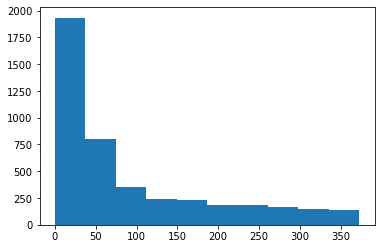

In [11]:
# Ploting a histogram
plt.hist(user_df['Recency']);

It can be seen that most customers have made a purchase within the last 0-50 days which means that majority of the customers are active.

### Finding Purchase Frequency of Customers

Now, let us answer the question - How many times did each unique customer make a purchase? (Frequency)

We will engineer a new feature that will help us determine the frequency of purchases made by each unique customer. For this, we will count the number of rows present in the cleaned transactional data for each unique customer since each row is a purchase made by a customer.

In [12]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


Counting the number of transactions of each CustomerID gives the number of times each customer has made a purchase.

In [13]:
# Getting the frequency distribution of each CustomerID
df_frequency = customer_df['CustomerID'].value_counts().reset_index()

# Renaming the columns
df_frequency.columns = ['CustomerID', 'Frequency']

# Looking at the first five rows
df_frequency.head()

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


Merging this DataFrame with the `user_df` DataFrame based on CustomerID.

In [14]:
# Merge this data to our main dataframe
user_df = pd.merge(user_df, df_frequency, on='CustomerID')

In [15]:
# Looking at the first five rows
user_df.head()

,CustomerID,Recency,Frequency
0,18074,373,13
1,13747,373,1
2,12791,373,2
3,17908,373,58
4,16583,373,14


Let us plot the frequency distribution of all the frequency using a histogram.

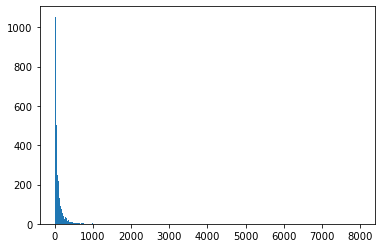

In [16]:
# Ploting a histogram
plt.hist(user_df['Frequency'], bins=500);

Since the histogram is not clearly outlining the outliers, let us make a scatter plot as well.

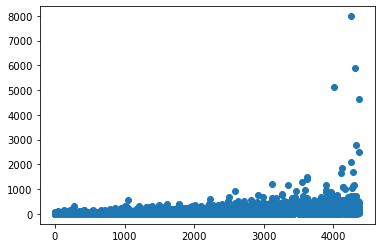

In [17]:
# Plotting a scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Frequency'])

We can see that most unique customers have made purchases between 1-1000 times in the online retail store. There are also some outlier customers who have purchased items from the online retail shop for more than 1000 times. 

### Finding Monetary Value of Customers

Finally, let us answer the question - How much did each unique customer spend in total? (Monetary Value)

We will engineer a new feature that will help us determine the monetary value of purchase made by each unique customer. For this, we will sum the amount spent by each customer in the cleaned transactional dataset.

In [18]:
# Looking at the first five rows
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [19]:
# Getting the total amount spent by each customer
df_amount = customer_df.groupby('CustomerID')['AmountSpent'].sum().reset_index()

# Renaming the column name as Revenue
df_amount.rename(columns = {"AmountSpent": "Revenue"}, inplace = True)

# Looking at the first five rows
df_amount.head()

,CustomerID,Revenue
0,12346,154367.20
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


Merging this DataFrame with the `user_df` DataFrame based on CustomerID.

In [20]:
# Merge this data to our main dataframe
user_df = pd.merge(user_df, df_amount, on='CustomerID')

In [21]:
# Looking at the first five rows
user_df.head()

,CustomerID,Recency,Frequency,Revenue
0,18074,373,13,489.60
1,13747,373,1,79.60
2,12791,373,2,192.60
3,17908,373,58,243.28
4,16583,373,14,233.45


Let us plot the frequency distribution of total amount spent using a histogram.

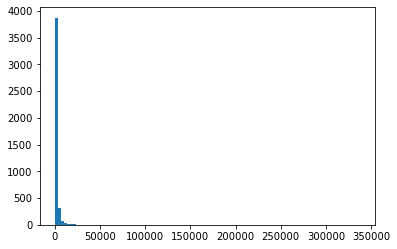

In [22]:
# Ploting a histogram
plt.hist(user_df['Revenue'], bins=100);

Since the histogram is not clearly outlining the outliers, let us make a scatter plot as well.

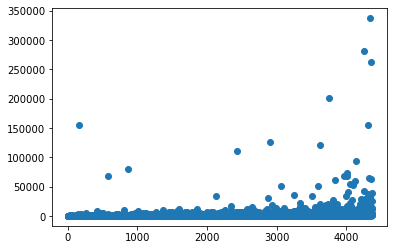

In [23]:
# Plotting a scatter plot
plt.scatter(range(user_df.shape[0]), user_df['Revenue'])

It can be seen that most customers have made a purchase within 50,000 but there are some outlier cases who have made purchases over 50,000.

Great! We now have the answer to all three of the questions. 

Let us save the dataset we've generated till now and perform customer profiling and segmentation in the next lesson.

In [24]:
# Saving as a new CSV file
user_df.to_csv('data/user_dataset.csv', header=True, index=False)

That is it for this lesson!

As an exercise, I would encourage you to analyze the correlation between the Recency, Frequency and Monetary Value distribution of all the customers using a correlation matrix. This will help you to see whether the engineered features are positively/negatively correlated and the uniqueness of each feature.